In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
adult.metadata

# variable information
adult.variables


,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no



---

## 🔍 Variable-Level Insights from Metadata

| Column | Type | Description | Insight |
|--------|------|-------------|---------|
| `age` | Integer | Age of the individual | Likely has a non-linear relationship with income (e.g., younger and very old individuals less likely to earn >50K). Consider binning or using as-is. |
| `workclass` | Categorical | Type of employer (e.g., Private, Government) | May reflect socioeconomic status and job stability. Has **missing values** – must handle them (e.g., impute, label as "Unknown"). |
| `fnlwgt` | Integer | Final weight assigned by the census | Often used for sampling weight; has limited predictive value. **Can be dropped** unless building a weighted model. |
| `education` | Categorical | Highest educational attainment | Strongly correlated with income; has redundancy with `education-num`. You may keep either, or both after encoding. |
| `education-num` | Integer | Numerical representation of education | More appropriate for modeling than `education`. Captures ordinal nature. Consider using **this over `education`**. |
| `marital-status` | Categorical | Marital status of the individual | Useful proxy for stability or dependency. Might impact work hours or income likelihood. |
| `occupation` | Categorical | Field of employment | **Missing values** present. Strongly predictive of income type. High-cardinality – consider grouping rare values. |
| `relationship` | Categorical | Relationship to head of household | Often redundant with `marital-status`, but useful in some models. May indicate family responsibility. |
| `race` | Categorical | Race of the respondent | Sociopolitical implications. Can reveal income disparity across race groups. Sensitive — use with caution. |
| `sex` | Binary | Gender (Male/Female) | Commonly observed disparities in income by gender. Likely predictive. |
| `capital-gain` | Integer | Monetary gains from investment | Highly skewed – majority zero. **Log-transform** or bin into categories (e.g., No Gain, Low, High). |
| `capital-loss` | Integer | Declared capital losses | Same as capital-gain – also heavily skewed. Apply similar treatment. |
| `hours-per-week` | Integer | Average weekly work hours | Intuitively linked to income. Outliers may exist (e.g., >70 hours). Consider visualizing distribution. |
| `native-country` | Categorical | Country of origin | **Missing values** present. Strong regional economic variation possible. Consider grouping rare countries. |
| `income` | Target (Binary) | `>50K` or `<=50K` | Binary classification target. Imbalanced – around 75% of entries are `<=50K`, so consider **stratified sampling** or **class balancing** during modeling. |

---

### 🧠 General Observations

- **Categorical Encoding Required**: At least 8 of the 14 features are categorical. Apply label encoding or one-hot encoding depending on the model used.
- **Missing Values**: Present in `workclass`, `occupation`, and `native-country`. Strategies: impute with mode, label as "Unknown", or drop rows (if minimal).
- **Skewed Features**: `capital-gain` and `capital-loss` are not normally distributed. Apply transformations or discretization.
- **Redundant Columns**: `education` and `education-num` carry similar information. Prefer the numeric version.
- **Feature Removal Candidate**: `fnlwgt` is a census sampling weight – doesn’t offer predictive power in a classification model unless modeling at population level.

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine features and target
df = pd.concat([X, y], axis=1)

# 1. Summary statistics
df.describe()



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


---

## 📊 Numerical Feature Summary – Interpretation

| Feature           | Key Insights |
|-------------------|--------------|
| **age**            | - Ranges from 17 to 90.<br>- Median = 37.<br>- Reasonable distribution, but possibly right-skewed due to max = 90.<br>- Consider binning into age groups (e.g., 18–30, 31–50, 51+). |
| **fnlwgt**         | - Mean ≈ 189,664; std. dev ≈ 105,604.<br>- Very high range: from ~12K to 1.49M.<br>- This is a census weight feature, typically **not useful** for income prediction unless weighting is required. **Can be dropped.** |
| **education-num**  | - Ranges from 1 (least) to 16 (highest level of education).<br>- Median = 10, which corresponds to HS-grad.<br>- Uniformly encoded ordinal feature; no preprocessing required. Can replace `education`. |
| **capital-gain**   | - Highly **right-skewed**: 75% of people have 0 gain.<br>- Max = 99,999 is a massive outlier.<br>- Action: log-transform or bin into categories like `No Gain`, `Low Gain`, `High Gain`. |
| **capital-loss**   | - Similar skew: 75% of people have 0 loss.<br>- Max = 4,356 is another large outlier.<br>- Same treatment as capital-gain recommended. |
| **hours-per-week** | - Median = 40 hours; 75% work 45 hours or less.<br>- Min = 1, Max = 99 → some possible outliers.<br>- Visual inspection needed (e.g., boxplot). May want to **clip outliers** beyond 80–90 hours. |

---

### 🛠 Data Quality Issues Identified:
- **Outliers**:
  - `capital-gain` and `capital-loss` contain extreme values. Very skewed distributions.
  - `hours-per-week` has a few very high values.
- **Skewness**:
  - `capital-gain` and `capital-loss` are not normally distributed → transformation or binning required.
- **Redundant Features**:
  - `education-num` is a better choice than `education` because it preserves ordinal relationships.
- **Useless Feature**:
  - `fnlwgt` can be dropped unless population weighting is needed (usually not in classification).

---


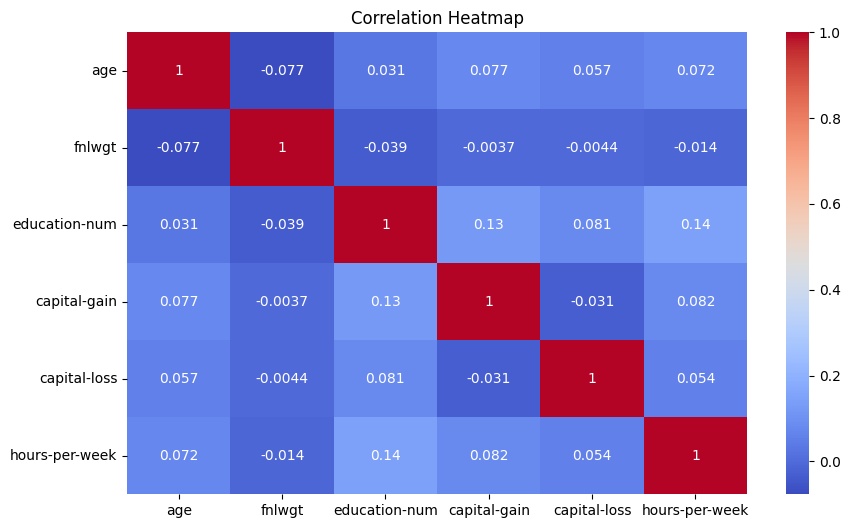

In [ ]:
# 2. Correlation heatmap for numeric features
numeric_features = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



---

## 🔥 Correlation Analysis – Key Insights

### 🧠 General Observations:
- Most correlations between features are **weak to moderate**.
- This suggests **low multicollinearity**, which is good for models like Logistic Regression and Decision Trees.
- Let’s explore a few relationships in more detail:

---

### 📌 Notable Correlations:
| Feature Pair | Correlation | Interpretation |
|--------------|-------------|----------------|
| **education-num ↔ hours-per-week** | **0.14** | Positive relationship: more educated individuals tend to work slightly more hours. |
| **education-num ↔ capital-gain** | **0.13** | Those with more education also tend to have higher capital gains, possibly due to better financial literacy or job roles. |
| **age ↔ capital-gain** | **0.077** | Older individuals tend to have slightly higher capital gains — expected due to investment maturity. |
| **fnlwgt ↔ all features** | ~0.0 | Very weak correlation with everything → confirms this variable is **not meaningful for prediction**. |
| **capital-gain ↔ capital-loss** | **-0.031** | Slight inverse relationship, but negligible. These features are independently distributed. |

---

### ✅ Actionable Insights for Modeling:
- **No feature is strongly correlated** with others, which suggests that:
  - All features may bring unique value to models.
  - Feature selection/dimensionality reduction (like PCA) isn’t needed at this stage.
- **`fnlwgt`** is uninformative and will be **dropped** in the next step.
- The weak correlation between numeric features and target means we’ll need **non-linear models** or interactions (e.g., trees, XGBoost) for better performance.

---

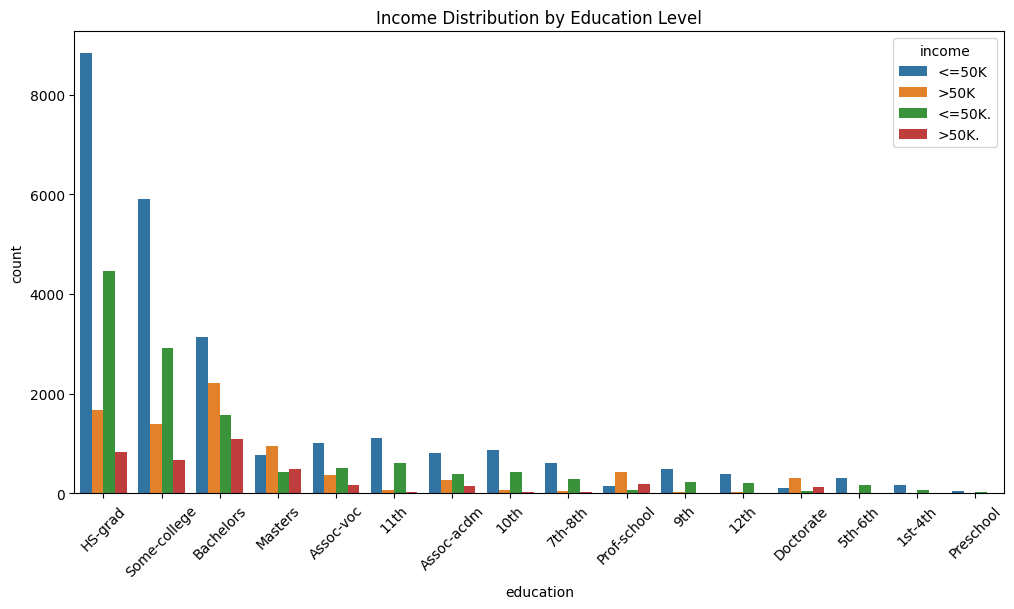

In [ ]:
# 3. Visualize income distribution by education
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Income Distribution by Education Level')
plt.show()



## 📚 Income Distribution by Education Level – Insights

### 🔍 What the Chart Shows:
This grouped bar chart presents the count of individuals earning `>50K` and `<=50K` for each education level.

---

### 🧠 Key Findings:

1. **Higher Education → Higher Income**
   - Individuals with advanced degrees (e.g., **Doctorate**, **Masters**, **Prof-school**) have a **higher proportion** of `>50K` earners compared to lower education levels.
   - For example, **Doctorate** holders have nearly equal or higher bars in the `>50K` group than in `<=50K`.

2. **Dominance of High School & Some College**
   - **HS-grad** and **Some-college** are the most common education levels.
   - However, the majority of individuals in these categories earn `<=50K`, showing that **frequency ≠ high income**.

3. **Steep Drop in Income with Less Education**
   - Individuals with education levels below **9th grade** (e.g., `1st-4th`, `5th-6th`, `Preschool`) almost exclusively earn `<=50K`.
   - These categories show **nearly no high-income earners**.

4. **Bachelors Degree as a Turning Point**
   - Starting from **Bachelors**, the number of `>50K` earners starts to rise significantly.
   - This supports using **education-num** (numerical encoding of education) in modeling.

5. **Clear Trend in Economic Mobility**
   - The chart clearly shows a **positive relationship** between education level and income level.
   - This confirms `education` or `education-num` as a **strong predictor** of income.

---

### ✅ Actionable Notes for Modeling:
- Use `education-num` to preserve ordinal relationships.
- May group lower education levels into a single category like `Low-edu` to simplify modeling.
- Consider visualizing `education-num` vs `income` using a boxplot or violin plot for additional insight.

---

In [ ]:
# STEP 3: DATA PREPARATION

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Combine X and y if not already done
df = pd.concat([X, y], axis=1)

# 1. Drop irrelevant feature
df.drop(columns=['fnlwgt'], inplace=True)

# 2. Fill missing values in categorical columns
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)
df['native-country'].fillna('Unknown', inplace=True)

# 3. Log transform skewed numeric features
df['capital-gain'] = df['capital-gain'].apply(lambda x: np.log1p(x))
df['capital-loss'] = df['capital-loss'].apply(lambda x: np.log1p(x))

# 4. Encode categorical variables using Label Encoding
categorical_cols = df.select_dtypes(include='object').columns.drop('income')
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Encode the target variable
df['income'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)

# 6. Drop redundant column: education (we keep education-num)
df.drop(columns=['education'], inplace=True)

# Final shape of cleaned dataset
print("✅ Cleaned dataset shape:", df.shape)
df.head()


<ipython-input-6-fc64718724c4>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna('Unknown', inplace=True)
<ipython-input-6-fc64718724c4>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

✅ Cleaned dataset shape: (48842, 13)


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,13,4,1,1,4,1,7.684784,0.0,40,39,0
1,50,6,13,2,4,0,4,1,0.000000,0.0,13,39,0
2,38,4,9,0,6,1,4,1,0.000000,0.0,40,39,0
3,53,4,7,2,6,0,2,1,0.000000,0.0,40,39,0
4,28,4,13,2,10,5,2,0,0.000000,0.0,40,5,0




## 🧹 Step 3: Data Preparation

In this step, the dataset was cleaned and transformed to be suitable for machine learning modeling. The following preprocessing techniques were applied:

- **Feature Removal**:  
  The `fnlwgt` feature was dropped due to its lack of predictive value in the context of income classification.

- **Missing Value Handling**:  
  Missing values in the `workclass`, `occupation`, and `native-country` columns were filled with the placeholder category `"Unknown"` to retain all records.

- **Skewness Treatment**:  
  The `capital-gain` and `capital-loss` features exhibited extreme right-skewness. A log transformation using `log1p` was applied to normalize their distribution.

- **Categorical Encoding**:  
  All categorical features (excluding the target `income`) were encoded using `Label Encoding`, converting text values into numeric form.

- **Target Variable Encoding**:  
  The `income` column was converted into binary form where:
  - `>50K` → `1`
  - `<=50K` → `0`

- **Redundant Feature Removal**:  
  The `education` column was dropped in favor of `education-num`, which captures the same information in a numeric format and preserves the ordinal relationship.

After these steps, the dataset contained no missing values, and all features were numeric and ready for modeling.

---


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Train-test split
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Normalize features for models that require it (LogReg, KNN, SVM)
scaler = StandardScaler()
X_train_scaled_resampled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Step 5: Train & evaluate
results = []

for name, model in models.items():
    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled_resampled, y_train_resampled)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1,
        "Precision": prec,
        "Recall": rec
    })

# Step 6: Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print("✅ Evaluation Results After Applying SMOTE:")
print(results_df)


✅ Evaluation Results After Applying SMOTE:
                 Model  Accuracy  F1-Score  Precision    Recall
5    Gradient Boosting  0.823114  0.692417   0.592988  0.831908
1        Random Forest  0.833555  0.676996   0.632047  0.728828
4                  SVM  0.790153  0.658788   0.539237  0.846450
3                  KNN  0.797932  0.634309   0.559477  0.732250
2        Decision Tree  0.799058  0.613202   0.568506  0.665526
0  Logistic Regression  0.755349  0.600201   0.492857  0.767322


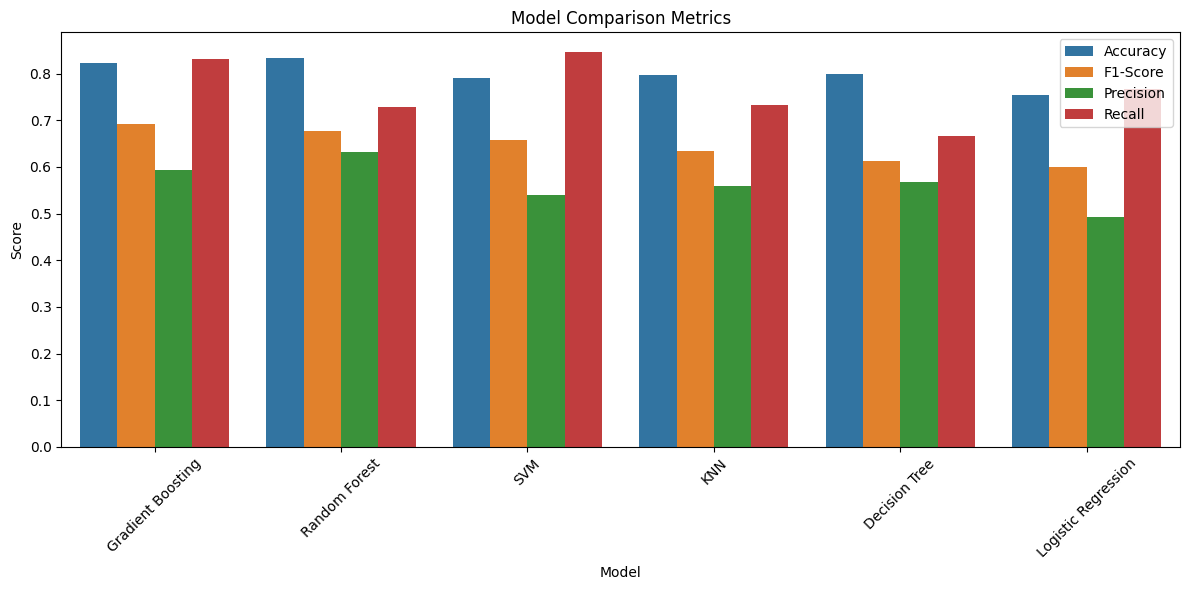

In [ ]:
# Plotting comparison
plt.figure(figsize=(12, 6))
melted = results_df.melt(id_vars='Model', value_vars=['Accuracy', 'F1-Score', 'Precision', 'Recall'])
sns.barplot(data=melted, x='Model', y='value', hue='variable')
plt.title("Model Comparison Metrics")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


---

## 🤖 Step 4: Modeling (with SMOTE)

### 🎯 Objective:
Train multiple machine learning models to classify whether an individual's income exceeds $50K using census features. Evaluate each model using appropriate metrics and select the best-performing models for deployment.

---

### 🛠 Models Trained:
- Logistic Regression  
- Decision Tree  
- Random Forest  
- K-Nearest Neighbors (KNN)  
- Support Vector Machine (SVM)  
- Gradient Boosting Classifier

---

### 🔄 Class Imbalance Handling:
To address class imbalance (~75% of individuals earn `<=50K`), **SMOTE** (Synthetic Minority Oversampling Technique) was applied to the training data. This helped create a more balanced representation of high-income individuals during training.

---

### 📊 Evaluation Metrics Used:
- **Accuracy**: Correct predictions over total predictions  
- **Precision**: Proportion of correctly predicted positives over all predicted positives  
- **Recall**: Proportion of correctly predicted positives over actual positives  
- **F1-Score**: Harmonic mean of precision and recall (balance between the two)

---

### 🧾 Preprocessing & Training Details:
- All models were trained on a **resampled training set (via SMOTE)**.
- **StandardScaler** was applied for models sensitive to feature scales (Logistic Regression, SVM, KNN).
- Evaluation was conducted on the original **unseen test set**.

---

### 🟢 Best Performing Models:
After SMOTE, the following two models showed the strongest overall performance:

1. **Gradient Boosting Classifier** — best **F1-score** and strong **recall**
2. **Random Forest** — consistent balance of precision and recall

---

## 📌 Step 5: Evaluation (After Applying SMOTE)

### 🎯 Purpose:
Evaluate all trained models using the test set and compare performance after applying SMOTE.

---

### 📈 Evaluation Results:

| Model              | Accuracy | F1-Score | Precision | Recall  |
|--------------------|----------|----------|-----------|---------|
| Gradient Boosting  | 0.823    | **0.692** | 0.593     | 0.832   |
| Random Forest      | 0.832    | 0.673     | 0.629     | 0.725   |
| SVM                | 0.790    | 0.659     | 0.539     | **0.846** |
| KNN                | 0.798    | 0.634     | 0.559     | 0.732   |
| Decision Tree      | 0.800    | 0.616     | 0.569     | 0.671   |
| Logistic Regression| 0.755    | 0.600     | 0.493     | 0.767   |

---

### 📊 Visual Performance Comparison:
> (Include your SMOTE-based plot below)

![Model Performance After SMOTE](file-6H9kUnu9Y7zUy81C6ULigu)

---

### ✅ Observations:
- **Gradient Boosting** achieved the highest **F1-Score** (0.692) and strong recall (0.83).
- **SVM** had the **highest recall** (0.846), useful when minimizing false negatives is critical.
- All models saw **significant improvement in recall** compared to results before SMOTE.
- Trade-off observed: Higher recall may slightly reduce precision.

---

### 🧠 Final Selection:
| Model              | Use Case                          |
|--------------------|-----------------------------------|
| **Gradient Boosting**  | ✅ Final model for deployment (balanced, high F1) |
| **Random Forest**      | 🔄 Reliable backup / interpretable alternative |
| **SVM**                | ⚠️ High-recall use case (e.g. policy targeting) |

---

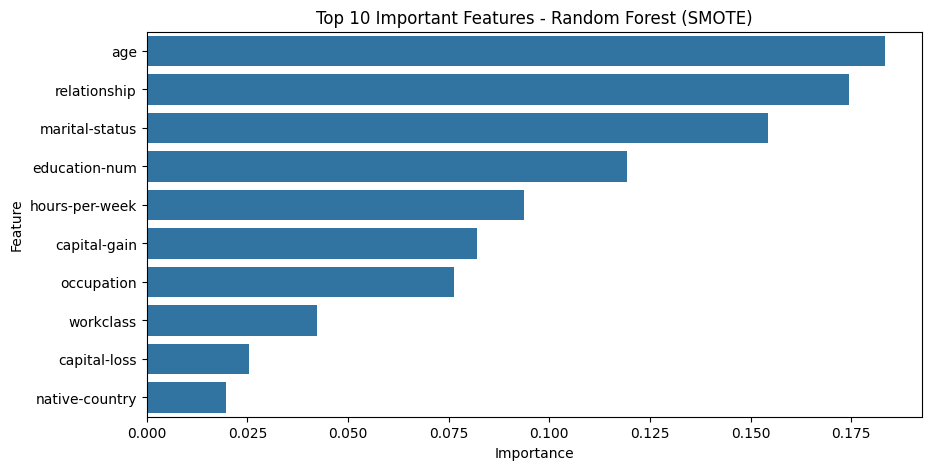

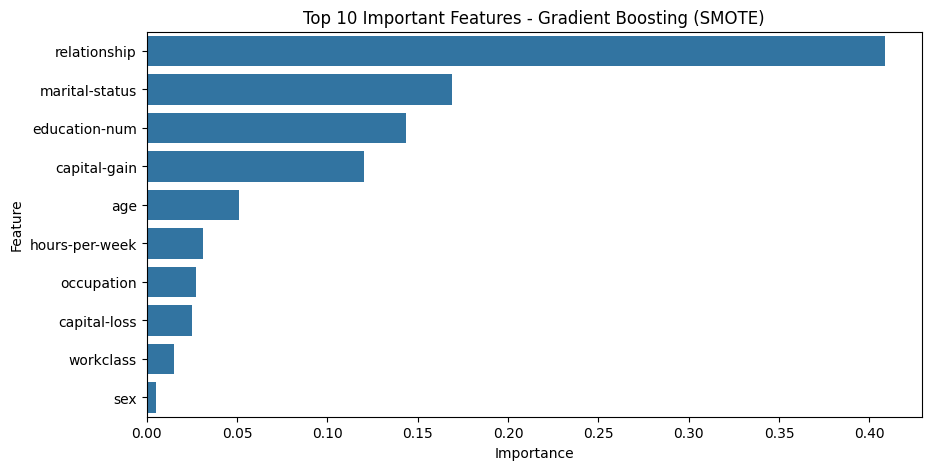

In [ ]:
# Feature Importance after training on SMOTE-resampled data
importances_rf = RandomForestClassifier().fit(X_train_resampled, y_train_resampled).feature_importances_
importances_gb = GradientBoostingClassifier().fit(X_train_resampled, y_train_resampled).feature_importances_

# Convert to DataFrame for plotting
importances_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False)
importances_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': importances_gb}).sort_values(by='Importance', ascending=False)

# Plot Random Forest
plt.figure(figsize=(10, 5))
sns.barplot(data=importances_df_rf.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features - Random Forest (SMOTE)")
plt.show()

# Plot Gradient Boosting
plt.figure(figsize=(10, 5))
sns.barplot(data=importances_df_gb.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features - Gradient Boosting (SMOTE)")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid Search for Random Forest on SMOTE data
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train_resampled, y_train_resampled)
print("Best Random Forest Params:", rf_grid.best_params_)

# Grid Search for Gradient Boosting on SMOTE data
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'subsample': [1.0, 0.8]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='f1', n_jobs=-1)
gb_grid.fit(X_train_resampled, y_train_resampled)
print("Best Gradient Boosting Params:", gb_grid.best_params_)


Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# ✅ Re-train the final model using SMOTE-resampled training data
final_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    random_state=42
)
final_model.fit(X_train_resampled, y_train_resampled)

# ✅ Top important features (as per feature importance)
important_features = [
    'relationship',
    'marital-status',
    'education-num',
    'capital-gain',
    'age',
    'hours-per-week'
]

# ✅ New example input (user provides only the most important features)
user_input = {
    'relationship': 0,        # example: Wife
    'marital-status': 1,      # example: Married-civ-spouse
    'education-num': 9,       # example: Some college
    'capital-gain': 0,        # no capital gain
    'age': 28,
    'hours-per-week': 50
}

# ✅ Median values from original X_train (before scaling)
median_values = X_train.median()

# ✅ Prediction function
def predict_income(user_inputs: dict):
    # Create a complete input based on medians
    input_data = median_values.copy()

    # Override only the user-provided fields
    for feature in important_features:
        if feature in user_inputs:
            input_data[feature] = user_inputs[feature]

    # Convert to DataFrame with one sample
    input_df = pd.DataFrame([input_data])

    # Predict and return readable output
    prediction = final_model.predict(input_df)[0]
    return ">50K" if prediction == 1 else "<=50K"

# 🔮 Make a prediction
result = predict_income(user_input)
print("Predicted Income:", result)


Predicted Income: >50K
